In [29]:
import numpy as np
import pandas as pd
import seaborn as sns

In [34]:
print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)

Pandas version:  1.1.5
Numpy version:  1.19.2


In [202]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.precision', 3)
# pd.set_option('display.float_format', lambda x: '%.5f' % x)
# pd.options.display.float_format = '{:.5f}'.format
# pd.reset_option('display.float_format')

## Challenge 1

In [ ]:
# import turnstile csv data into pandas dataframes from MTA website
df_5_wk1 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190504.txt")
df_5_wk2 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190511.txt")
df_5_wk3 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190518.txt")
df_5_wk4 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt")
df_6_wk1 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt")
df_6_wk2 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190608.txt")
df_5_wk1.shape

In [ ]:
# improvement from Vinny
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_()

In [125]:
# concatenate six separate weekly dataframes into one dataframe
ts_df = pd.concat([df_5_wk1, df_5_wk2, df_5_wk3, df_5_wk4, df_6_wk1, df_6_wk2]).reset_index()
ts_df.shape

(1231795, 12)

In [126]:
ts_df.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020


## Challenge 2

In [127]:
print(list(ts_df.columns))

['index', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS                                                               ']


In [128]:
ts_df = ts_df.drop(columns = 'index')

In [140]:
# clean column name 'EXITS' of extra whitespace
ts_df.rename(columns = {'EXITS                                                               ':'EXITS'}, inplace=True)

In [141]:
ts_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATETIME'],
      dtype='object')

In [142]:
# concatenate DATE and TIME columns to create DATETIME column
ts_df['DATETIME'] = ts_df['DATE'] + " " + ts_df['TIME']

In [143]:
ts_df['DATETIME'].head()

0    04/27/2019 00:00:00
1    04/27/2019 04:00:00
2    04/27/2019 08:00:00
3    04/27/2019 12:00:00
4    04/27/2019 16:00:00
Name: DATETIME, dtype: object

In [144]:
# convert 'DATETIME' to datetime type
ts_df['DATETIME'] = pd.to_datetime(ts_df['DATETIME'])

In [145]:
ts_df['DATETIME'].head()

0   2019-04-27 00:00:00
1   2019-04-27 04:00:00
2   2019-04-27 08:00:00
3   2019-04-27 12:00:00
4   2019-04-27 16:00:00
Name: DATETIME, dtype: datetime64[ns]

In [147]:
print(list(ts_df.columns))

['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS', 'DATETIME']


In [148]:
clean_cols = ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DESC', 'ENTRIES', 'EXITS', 'DATETIME']

## Challenge 3

In [170]:
# Group the data so that it represents daily entries for each turnstile

df_agg = ts_df.groupby(ts_df['DATETIME'].dt.date).agg({'ENTRIES':'sum'}).reset_index()

In [184]:
df_group = ts_df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE']).agg('sum').reset_index()

In [178]:
df_agg.head()

,DATETIME,ENTRIES
0,2019-04-27,1190319911548
1,2019-04-28,1190651123622
2,2019-04-29,1247548741795
3,2019-04-30,1167245924914
4,2019-05-01,1190726746500


In [185]:
df_group.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,04/27/2019,42212783,14309589
1,A002,R051,02-00-00,59 ST,04/28/2019,42217534,14310871
2,A002,R051,02-00-00,59 ST,04/29/2019,42222537,14312896
3,A002,R051,02-00-00,59 ST,04/30/2019,42231580,14315824
4,A002,R051,02-00-00,59 ST,05/01/2019,42240617,14318596


In [203]:
df_group.sort_values(by='ENTRIES', ascending=False).head(50)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS
150962,R210,R044,00-03-04,BROOKLYN BRIDGE,05/14/2019,30314766648,43999971985
60740,N100,R252,00-00-02,HIGH ST,06/01/2019,26808907105,24911924647
89472,N400A,R359,02-00-03,COURT SQ,05/24/2019,20669565654,6815485834
137154,R148,R033,01-00-01,TIMES SQ-42 ST,05/15/2019,18918041296,14282527307
137156,R148,R033,01-00-01,TIMES SQ-42 ST,05/17/2019,18917978622,14282556518
168871,R304,R206,00-00-00,125 ST,05/02/2019,18604684086,8683218762
32994,H023,R236,00-06-00,DEKALB AV,05/21/2019,17344980125,7705209643
130416,R116,R030,00-00-02,CHAMBERS ST,06/05/2019,16926766499,13702246076
130415,R116,R030,00-00-02,CHAMBERS ST,06/04/2019,16926757522,13702238274
168884,R304,R206,00-00-00,125 ST,05/15/2019,16913089029,7893913574


## Challenge 4

In [186]:
# plot daily time series for a single turnstile
%matplotlib inline
import matplotlib.pyplot as plt

In [187]:
single_turn = df_group[(df_group['C/A'] == 'R236') & (df_group['UNIT'] == 'R045') & 
                       (df_group['SCP'] == '00-00-00') & (df_group['STATION'] == 'GRD CNTRL-42 ST')]

In [188]:
single_turn.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS
155901,R236,R045,00-00-00,GRD CNTRL-42 ST,04/27/2019,11728498,32101307
155902,R236,R045,00-00-00,GRD CNTRL-42 ST,04/28/2019,11731518,32110861
155903,R236,R045,00-00-00,GRD CNTRL-42 ST,04/29/2019,17602674,48189439
155904,R236,R045,00-00-00,GRD CNTRL-42 ST,04/30/2019,11748903,32158450
155905,R236,R045,00-00-00,GRD CNTRL-42 ST,05/01/2019,11762046,32188584


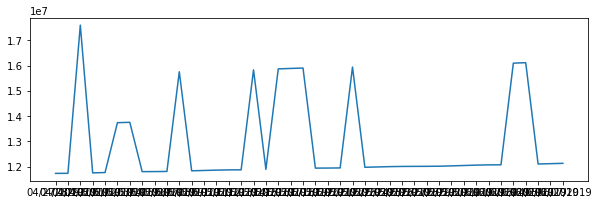

In [189]:
plt.figure(figsize=(10,3))
plt.plot(single_turn['DATE'],single_turn['ENTRIES'])

## Challenge 5

In [209]:
df_station = ts_df.groupby(['C/A', 'UNIT', 'STATION', 'DATE']).agg('sum').reset_index()

In [210]:
df_station.head()

,C/A,UNIT,STATION,DATE,ENTRIES,EXITS
0,A002,R051,59 ST,04/27/2019,330671407,183300777
1,A002,R051,59 ST,04/28/2019,330718976,183326361
2,A002,R051,59 ST,04/29/2019,330767109,183361251
3,A002,R051,59 ST,04/30/2019,330846493,183410800
4,A002,R051,59 ST,05/01/2019,330928863,183461160


## Challenge 6

In [211]:
df_station_2 = ts_df.groupby(['STATION', 'DATE']).agg('sum').reset_index()

In [212]:
df_station_2.head()

,STATION,DATE,ENTRIES,EXITS
0,1 AV,04/27/2019,8479899485,8780948668
1,1 AV,04/28/2019,8479935635,8780999615
2,1 AV,04/29/2019,8934250778,9224520866
3,1 AV,04/30/2019,8480098387,8781190283
4,1 AV,05/01/2019,8480212399,8781313942


## Challenge 6

In [214]:
df_brooklyn_bridge = df_station_2[df_station_2.STATION =='BROOKLYN BRIDGE']
df_brooklyn_bridge.shape

(42, 4)

(1000000000.0, 10000000000.0)

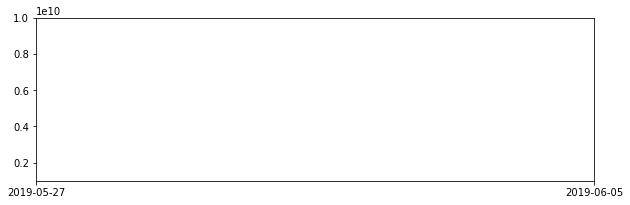

In [219]:
plt.figure(figsize=(10,3))
plt.plot(df_brooklyn_bridge['DATE'],df_brooklyn_bridge['ENTRIES'])
#plt.xticks(['2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16'])
plt.xlim(['2019-05-27', '2019-06-05'])
plt.ylim([0.1e10, 1e10])

In [ ]:
plt.plot(df_c6_bb[df_c6_bb['DATE']])

In [ ]:
plt.xticks()

In [204]:
ts_df['STATION'].unique()

array(['59 ST', '5 AV/59 ST', '57 ST-7 AV', '49 ST', 'TIMES SQ-42 ST',
       '34 ST-HERALD SQ', '28 ST', '23 ST', '14 ST-UNION SQ', '8 ST-NYU',
       'PRINCE ST', 'CANAL ST', 'CITY HALL', 'CORTLANDT ST', 'RECTOR ST',
       'WHITEHALL S-FRY', 'DELANCEY/ESSEX', 'BOWERY', 'CHAMBERS ST',
       'FULTON ST', 'BROAD ST', '7 AV', 'PARK PLACE', 'BOTANIC GARDEN',
       'PROSPECT PARK', 'PARKSIDE AV', 'CHURCH AV', 'BEVERLEY ROAD',
       'CORTELYOU RD', 'NEWKIRK PLAZA', 'AVENUE H', 'AVENUE J',
       'AVENUE M', 'KINGS HWY', 'AVENUE U', 'NECK RD', 'SHEEPSHEAD BAY',
       'BRIGHTON BEACH', 'OCEAN PKWY', 'BOROUGH HALL', 'JAY ST-METROTEC',
       'DEKALB AV', 'ATL AV-BARCLAY', 'UNION ST', '4AV-9 ST',
       'PROSPECT AV', '25 ST', '36 ST', '45 ST', '53 ST', 'BAY RIDGE AV',
       '77 ST', '86 ST', 'BAY RIDGE-95 ST', '8 AV', 'FT HAMILTON PKY',
       'NEW UTRECHT AV', '18 AV', '20 AV', 'BAY PKWY', '9 AV', '50 ST',
       '55 ST', '71 ST', '79 ST', '25 AV', 'BAY 50 ST', 'CONEY IS-STILLW',
      

In [118]:
busy = turnstiles_df[turnstiles_df['STATION']== 'GRD CNTRL-42 ST']

In [123]:
len(busy.SCP.unique())

37

```python
# to show just the first entry with the NaNs for each station

turnstiles_daily.sort_values(['DATE']).groupby(['C/A', 'UNIT', 'SCP', 'STATION']).head(1)
```